In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_excel('data_debtsustain.xlsx')
print(df.head())  # This will display the first few rows of the DataFrame


   country_id      country  year  default_ext  default_ext2    rgdpgr  \
0           1  Philippines  1995            0             0  4.625225   
1           1  Philippines  1996            0             0  5.860348   
2           1  Philippines  1997            0             0  5.186412   
3           1  Philippines  1998            0             0 -0.514091   
4           1  Philippines  1999            0             0  3.346451   

   rgdpgr_z  debt_ppgdebt  debt_ppgdebt_z  debt_dsbxgsi  ...  gg_nlbgdp  \
0 -0.260581     72.438503        1.766964     16.321244  ...     -0.016   
1  0.392214     61.525559        0.378674     13.580253  ...      0.537   
2  0.036021     52.054704       -0.826160      9.475806  ...      0.367   
3 -2.976847     54.418767       -0.525416     10.922605  ...     -1.309   
4 -0.936447     59.456455        0.115453     22.437779  ...     -2.288   

   gg_nlbgdp_z  gg_balgdp  gg_balgdp_z  mon_msres  mon_msres_z   mon_msgr  \
0     0.791125     -0.016     0.7

In [2]:
print(df.columns)



Index(['country_id', 'country', 'year', 'default_ext', 'default_ext2',
       'rgdpgr', 'rgdpgr_z', 'debt_ppgdebt', 'debt_ppgdebt_z', 'debt_dsbxgsi',
       'debt_dsbxgsi_z', 'debt_dsbgni', 'debt_dsbgni_z', 'debt_dsbexp',
       'debt_dsbexp_z', 'debt_debtgni', 'debt_debtgni_z', 'debt_stdebtrat',
       'debt_stdebtrat_z', 'debt_stres', 'debt_stres_z', 'debt_stxgsi',
       'debt_stxgsi_z', 'bop_cabgdp', 'bop_cabgdp_z', 'kaopen', 'kaopen_z',
       'res_bopimp', 'res_bopimp_z', 'er_app', 'er_app_z', 'inflation',
       'inflation_z', 'gg_nlbgdp', 'gg_nlbgdp_z', 'gg_balgdp', 'gg_balgdp_z',
       'mon_msres', 'mon_msres_z', 'mon_msgr', 'mon_msgr_z', 'mon_msgdp',
       'mon_msgdp_z'],
      dtype='object')


In [3]:
X1 = df.drop(['country','default_ext','default_ext2'], axis=1)
y = df['default_ext']
print(X1.shape)
print(y.shape)
from sklearn.impute import SimpleImputer

# Create an imputer that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your feature data
X = imputer.fit_transform(X1)

print(X1.columns)

(363, 40)
(363,)
Index(['country_id', 'year', 'rgdpgr', 'rgdpgr_z', 'debt_ppgdebt',
       'debt_ppgdebt_z', 'debt_dsbxgsi', 'debt_dsbxgsi_z', 'debt_dsbgni',
       'debt_dsbgni_z', 'debt_dsbexp', 'debt_dsbexp_z', 'debt_debtgni',
       'debt_debtgni_z', 'debt_stdebtrat', 'debt_stdebtrat_z', 'debt_stres',
       'debt_stres_z', 'debt_stxgsi', 'debt_stxgsi_z', 'bop_cabgdp',
       'bop_cabgdp_z', 'kaopen', 'kaopen_z', 'res_bopimp', 'res_bopimp_z',
       'er_app', 'er_app_z', 'inflation', 'inflation_z', 'gg_nlbgdp',
       'gg_nlbgdp_z', 'gg_balgdp', 'gg_balgdp_z', 'mon_msres', 'mon_msres_z',
       'mon_msgr', 'mon_msgr_z', 'mon_msgdp', 'mon_msgdp_z'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset

# Data Preprocessing

# Drop unnecessary columns (e.g., 'country_id', 'country') or encode them if needed
# Handle missing data if any

# Split data into features and target variable (assuming 'default_ext' is your target)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

# Random Forest Classifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    criterion='gini',
    bootstrap=True,
    class_weight=None  # You can specify class weights if needed
)

rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# Logistic Regression (Logit)

logit_classifier = LogisticRegression(
    C=1.0,  # You can adjust the regularization strength by changing C
    penalty='l2',  # Choose 'l1' or 'l2' for regularization type
    solver='lbfgs',  # Choose the solver algorithm
    max_iter=100,
    fit_intercept=True,
    multi_class='ovr'  # Choose 'ovr' or 'multinomial' for multiclass problems
)

logit_classifier.fit(X_train, y_train)
logit_pred = logit_classifier.predict(X_test)
logit_accuracy = accuracy_score(y_test, logit_pred)
print("Logistic Regression Accuracy:", logit_accuracy)
print(classification_report(y_test, logit_pred))

# XGBoost
import xgboost as xgb

# Create an XGBoost classifier with custom hyperparameters
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,        # Number of boosting rounds (trees)
    max_depth=10,             # Maximum depth of trees
    learning_rate=0.1,       # Learning rate (eta)
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=0.1,          # L2 regularization
    random_state=42          # Set a random seed for reproducibility
)

# Train the model and make predictions
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))



Random Forest Classifier Accuracy: 0.8356164383561644
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.88      0.60      0.71        25

    accuracy                           0.84        73
   macro avg       0.85      0.78      0.80        73
weighted avg       0.84      0.84      0.83        73

Logistic Regression Accuracy: 0.7808219178082192
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.70      0.64      0.67        25

    accuracy                           0.78        73
   macro avg       0.76      0.75      0.75        73
weighted avg       0.78      0.78      0.78        73

XGBoost Classifier Accuracy: 0.821917808219178
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        48
           1       0.93      0.52      0.67        25

    accuracy                    

In [13]:
# Multi-Layer Perceptron (MLP) Neural Network
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier with custom hyperparameters
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(5, 5),
    activation='logistic',
    learning_rate_init=0.001,
    max_iter=1000,
    alpha=0.01,  # Adjust the alpha value to control the strength of L2 regularization
    random_state=42
)

# Train the model and make predictions
mlp_classifier.fit(X_train, y_train)
mlp_pred = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("MLP Neural Network Accuracy:", mlp_accuracy)



print(classification_report(y_test, mlp_pred))


MLP Neural Network Accuracy: 0.7671232876712328
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        48
           1       0.70      0.56      0.62        25

    accuracy                           0.77        73
   macro avg       0.75      0.72      0.73        73
weighted avg       0.76      0.77      0.76        73



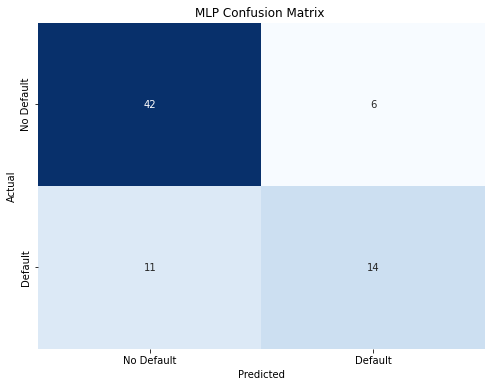

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, mlp_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix ')
plt.show()


In [47]:
print(X.shape)

(363, 40)


Index(['country_id', 'year', 'rgdpgr', 'rgdpgr_z', 'debt_ppgdebt',
       'debt_ppgdebt_z', 'debt_dsbxgsi', 'debt_dsbxgsi_z', 'debt_dsbgni',
       'debt_dsbgni_z', 'debt_dsbexp', 'debt_dsbexp_z', 'debt_debtgni',
       'debt_debtgni_z', 'debt_stdebtrat', 'debt_stdebtrat_z', 'debt_stres',
       'debt_stres_z', 'debt_stxgsi', 'debt_stxgsi_z', 'bop_cabgdp',
       'bop_cabgdp_z', 'kaopen', 'kaopen_z', 'res_bopimp', 'res_bopimp_z',
       'er_app', 'er_app_z', 'inflation', 'inflation_z', 'gg_nlbgdp',
       'gg_nlbgdp_z', 'gg_balgdp', 'gg_balgdp_z', 'mon_msres', 'mon_msres_z',
       'mon_msgr', 'mon_msgr_z', 'mon_msgdp', 'mon_msgdp_z'],
      dtype='object')


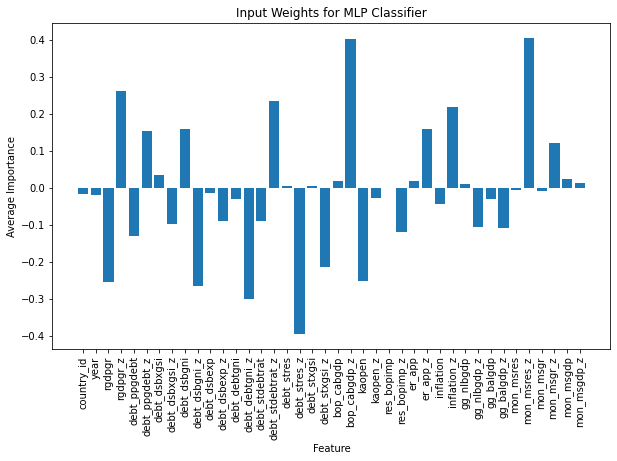

In [15]:
col_names = X1.columns
print(col_names)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X as a NumPy array and col_names as a list of column names

# Create a DataFrame from X with column names
X_df = pd.DataFrame(X, columns=col_names)

# Assuming you have calculated avg_importance
input_layer_weights = mlp_classifier.coefs_[0]

# Compute the average importance across all neurons in the input layer
avg_importance = np.mean(input_layer_weights, axis=1)
# Create a bar chart for variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(avg_importance)), avg_importance)
plt.xticks(range(len(col_names)), col_names, rotation=90)  # Set the number of ticks to match the number of labels
plt.xlabel('Feature')
plt.ylabel('Average Importance')
plt.title('Input Weights for MLP Classifier')
plt.show()



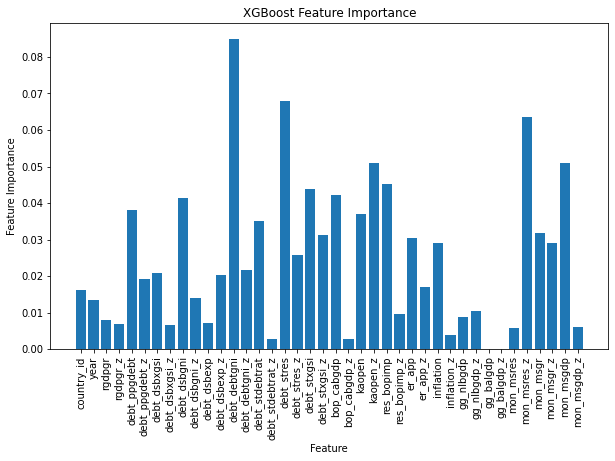

In [16]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_classifier is already trained
# Extract feature importances
importance_scores = xgb_classifier.feature_importances_

# Assuming you have the original DataFrame with column names as X_df
feature_names = X1.columns

# Create a custom feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set the feature names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


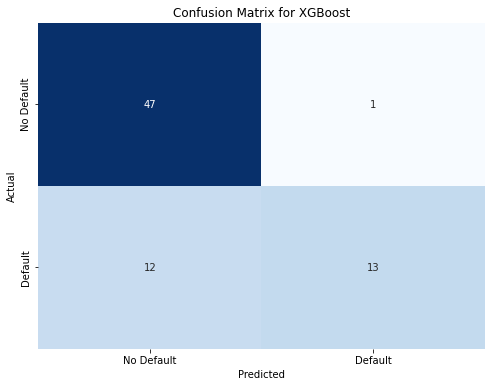

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, xgb_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [18]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_classifier, X, y, n_repeats=100, random_state=0)
importance_scores = result.importances_mean
print(importance_scores)


[ 1.32231405e-03  4.40771350e-04  4.60330579e-02  2.20385675e-03
  1.20909091e-01 -1.37741047e-03  7.74104683e-03 -1.65289256e-04
  3.28650138e-02  8.62258953e-03  1.37741047e-04  5.50964187e-04
  6.96418733e-02  1.14325069e-02  6.66391185e-02  2.47933884e-03
  5.34159780e-02  1.82644628e-02 -3.03030303e-04  2.97520661e-03
  2.01101928e-03  1.21212121e-02  9.66942149e-03  1.65289256e-04
  6.61157025e-04 -8.26446281e-05  1.43250689e-03  1.37741047e-04
  2.83746556e-02  3.03030303e-04 -8.26446281e-05  7.71349862e-04
  2.03856749e-03  1.01928375e-03  3.14049587e-03  2.86501377e-03
  1.91460055e-02 -6.33608815e-04  1.08264463e-02  0.00000000e+00]


In [19]:
importance_scores

array([ 1.32231405e-03,  4.40771350e-04,  4.60330579e-02,  2.20385675e-03,
        1.20909091e-01, -1.37741047e-03,  7.74104683e-03, -1.65289256e-04,
        3.28650138e-02,  8.62258953e-03,  1.37741047e-04,  5.50964187e-04,
        6.96418733e-02,  1.14325069e-02,  6.66391185e-02,  2.47933884e-03,
        5.34159780e-02,  1.82644628e-02, -3.03030303e-04,  2.97520661e-03,
        2.01101928e-03,  1.21212121e-02,  9.66942149e-03,  1.65289256e-04,
        6.61157025e-04, -8.26446281e-05,  1.43250689e-03,  1.37741047e-04,
        2.83746556e-02,  3.03030303e-04, -8.26446281e-05,  7.71349862e-04,
        2.03856749e-03,  1.01928375e-03,  3.14049587e-03,  2.86501377e-03,
        1.91460055e-02, -6.33608815e-04,  1.08264463e-02,  0.00000000e+00])

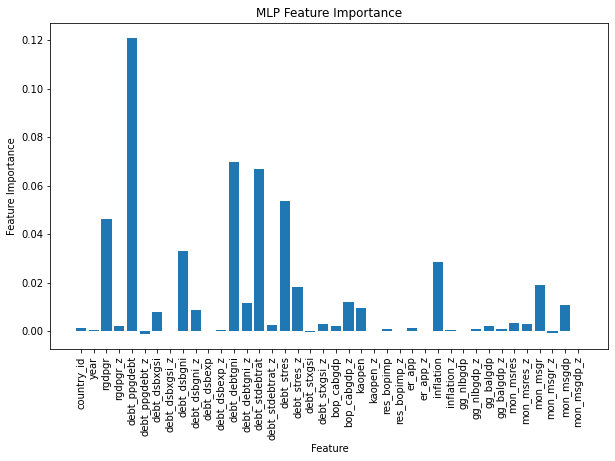

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set the feature names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('MLP Feature Importance')
plt.show()
